# Angle Modulation Demos

In [5]:
import numpy as np
import scipy as sp
import scipy.signal



#import matplotlib.pyplot as plt
#%matplotlib inline



In [2]:
import micropip

await micropip.install('ipywidgets')
await micropip.install('ipympl')

from ipywidgets import widgets, interact, fixed

In [3]:
import matplotlib.pyplot as plt
%matplotlib ipympl

## Triangular Message Signal

In [ ]:
# Triangle wave generation (scipy only seems to have sawtooth)
def triangle_wave(t, amplitude, period):
    m = [-2*(np.abs(-(np.fmod(t[i]*(amplitude)/period, amplitude)-amplitude/2)))+amplitude/2 for i in range(len(t))]
    m = np.array(m)
    return m;

tri_amplitude = 2
tri_period = 2e-4

max_time = 1*tri_period
t_steps = 20000
t = np.linspace(0,max_time,t_steps)

m = triangle_wave(t, tri_amplitude, tri_period)

# Using gradient may smooth this rather than a first order approximation
m_dot = np.diff(m)/(max_time/t_steps)

# Convert carrier frequency to radians/sec
wc = 100e6 * 2*np.pi

kP = 10*np.pi
kF = 2*np.pi*10**5

temp_wct = wc*t
temp_tpm = kP*m
temp_tpf = kF*np.cumsum(m)

theta_PM = wc*t + kP*m
theta_FM = wc*t + kF*np.cumsum(m)

#plt.plot(t, theta_PM, '.k')
#plt.plot(t, temp_wct, '.r')
#plt.plot(t, temp_tpm, '.b')

#plt.plot(t, theta_FM, '.k', markersize=12)
#plt.plot(t, temp_wct, '.r', alpha=0.7)
#plt.plot(t, temp_tpf, '.b', alpha=0.7)

A = 1
sP = A * np.cos(theta_PM)
sF = A * np.cos(theta_FM)
plt.plot(t*1e6,m);


In [ ]:
# Triangle wave generation (scipy only seems to have sawtooth)
def triangle_wave(t, amplitude, period):
    m = [-2*(np.abs(-(np.fmod(t[i]*(amplitude)/period, amplitude)-amplitude/2)))+amplitude/2 for i in range(len(t))]
    m = np.array(m)
    return m;

def plot_example_0501(kP):
    tri_amplitude = 1
    tri_period = 2e-4

    max_time = 1*tri_period
    t_steps = 20000
    t = np.linspace(0,max_time,t_steps)

    m = triangle_wave(t, tri_amplitude, tri_period)

    # Using gradient may smooth this rather than a first order approximation
    m_dot = np.diff(m)/(max_time/t_steps)



    # Convert carrier frequency to radians/sec
    wc = 1e5 * 2*np.pi



    temp_wct = wc*t
    temp_tpm = kP*m
    temp_tpf = kF*np.cumsum(m)

    theta_PM = wc*t + kP*m
    theta_FM = wc*t + kF*np.cumsum(m)    

    A = 1
    sP = A * np.cos(theta_PM)
    sF = A * np.cos(theta_FM)

    # figsize = (width, height)
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1,1,1)

    ax1.plot(1e6*t, sP, '-k')
    ax1.plot(1e6*t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
    ax1.plot(1e6*t[0:len(m_dot)], m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)
    ax1.set_ylim((-1.2*np.max(sP), 1.2*np.max(sP)))
    ax1.set_title("Phase Modulation");
    plt.show()

       
        
    
interact(
    plot_example_0501,
    kP = widgets.FloatSlider(min=0,max=16*np.pi, step=np.pi/2, value=0),
);

In [ ]:


def plot_example_0501b(kP,kF):
    tri_amplitude = 1
    tri_period = 2e-4

    kF=kF*1e-3
    max_time = 1*tri_period
    t_steps = 20000
    t = np.linspace(0,max_time,t_steps)

    m = triangle_wave(t, tri_amplitude, tri_period)

    # Using gradient may smooth this rather than a first order approximation
    m_dot = np.diff(m)/(max_time/t_steps)

    #plt.plot(t,m)
    #plt.ylim(-1.5,1.5)

    #plt.plot(t[0:len(m_dot)], m_dot/2e4)
    #print(m_dot[0])

    # Convert carrier frequency to radians/sec
    #wc = 100e6 * 2*np.pi
    wc = 1e5 * 2*np.pi

    #kP = 10*np.pi
    #kP = 5*np.pi
    #kF = 2e5*np.pi
    #kF = 2e-3*np.pi

    temp_wct = wc*t
    temp_tpm = kP*m
    temp_tpf = kF*np.cumsum(m)

    theta_PM = wc*t + kP*m
    theta_FM = wc*t + kF*np.cumsum(m)

    plot_signals = True
    
    if( not plot_signals ):
        # PM Instantaneous Phase
        #plt.plot(t, theta_PM, '.k')
        #plt.plot(t, temp_wct, '.r')
        #plt.plot(t, temp_tpm, '.b')

        # FM Instantaneous Phase
        plt.plot(t, theta_FM, '.k', markersize=12)
        plt.plot(t, temp_wct, '.r', alpha=0.7)
        plt.plot(t, temp_tpf, '.b', alpha=0.7)
        
    else:
        
        A = 1
        sP = A * np.cos(theta_PM)
        sF = A * np.cos(theta_FM)
        
        # figsize = (width, height)
        fig = plt.figure(figsize=(20,8))
        ax1 = fig.add_subplot(2,1,1)
        ax2 = fig.add_subplot(2,1,2)
        
        ax1.plot(t, sP, '-k')
        ax1.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
        ax1.plot(t[0:len(m_dot)], m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)
        ax1.set_ylim((-1.2*np.max(sP), 1.2*np.max(sP)))
        ax1.set_title("Phase Modulation")
        
        ax2.plot(t, sF, '-k')
        ax2.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
        ax2.plot(t[0:len(m_dot)], m_dot*(np.max(sF)/np.max(m_dot)), '.r', markersize=1)
        ax2.set_ylim((-1.2*np.max(sF), 1.2*np.max(sF)))
        ax2.set_title("Frequency Modulation")

        plt.show()

        
    
interact(
    plot_example_0501b,
    kP = widgets.FloatSlider(min=0,max=16*np.pi, step=np.pi/2, value=0),
    kF = widgets.FloatSlider(min=0,max=4*np.pi, step=1e-1*np.pi, value=0, description='kF * 1e3')
);

interactive(children=(FloatSlider(value=0.0, description='kP rad/V', max=3.141592653589793, step=0.31415926535…

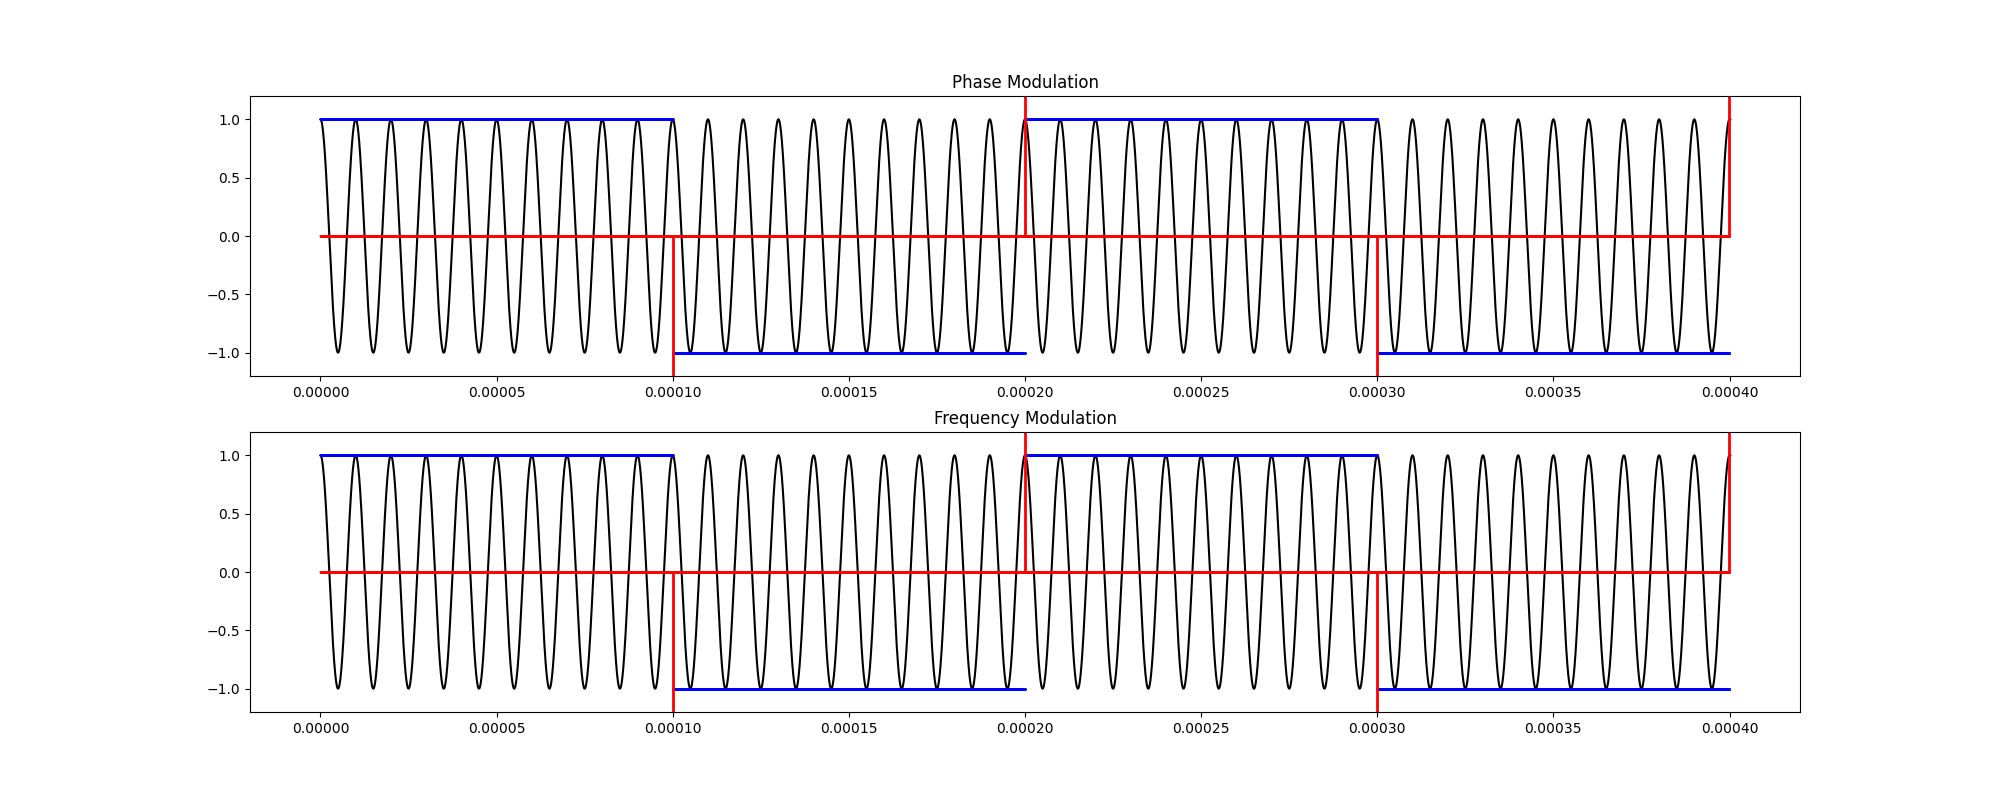

In [6]:
def square_wave(t, amplitude, period):

    m = amplitude*sp.signal.square(t*(2*np.pi/period))

    # Using gradient may smooth this rather than a first order approximation
    #m_dot = np.diff(m)/(max_time/t_steps)
    
    return m

def plot_example_0502(kP, kF):
    sq_amplitude = 1
    sq_period = 2e-4

    kF=kF*1e-4
    max_time = 2*sq_period
    t_steps = 20000
    t = np.linspace(0,max_time,t_steps)

    m = square_wave(t, sq_amplitude, sq_period)
    print(np.where(m[0:-1] !=m[1:]))
    m_dot = np.diff(m)/(max_time/t_steps)
    #plt.plot(t,m)
    #plt.plot(t[0:len(m_dot)],m_dot)
    #plt.xlim(-sq_period/2, np.max(t)+sq_period/2)
    #plt.ylim(-3,3)

    wc = 1e5 * 2*np.pi

    temp_wct = wc*t
    temp_tpm = kP*m
    temp_tpf = kF*np.cumsum(m)

    theta_PM = wc*t + kP*m
    theta_FM = wc*t + kF*np.cumsum(m)
    

        
    A = 1
    sP = A * np.cos(theta_PM)
    sF = A * np.cos(theta_FM)

    # figsize = (width, height)
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)


    ax1.plot(t, sP, '-k')
    ax1.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
    ax1.plot(t[0:len(m_dot)], m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)
    ax1.vlines(t[np.where( m[1:] > m[0:-1])], 0, 2, colors='r',linewidth=2)
    ax1.vlines(t[np.where( m[1:] < m[0:-1])], -2, 0, colors='r',linewidth=2)
    ax1.set_ylim((-1.2*np.max(sP), 1.2*np.max(sP)))
    ax1.set_title("Phase Modulation")

    ax2.plot(t, sF, '-k')
    ax2.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
    ax2.plot(t[0:len(m_dot)], m_dot*(np.max(sF)/np.max(m_dot)), '.r', markersize=1)
    ax2.vlines(t[np.where( m[1:] > m[0:-1])], 0, 2, colors='r',linewidth=2)
    ax2.vlines(t[np.where( m[1:] < m[0:-1])], -2, 0, colors='r',linewidth=2)

    ax2.set_ylim((-1.2*np.max(sF), 1.2*np.max(sF)))
    ax2.set_title("Frequency Modulation")
    plt.show()
    
interact(
    plot_example_0502,
    kP = widgets.FloatSlider(min=0,max=np.pi, step=np.pi/10, value=0, description='kP rad/V'),
    kF = widgets.FloatSlider(min=0,max=8*np.pi, step=0.1*np.pi, value=0, description='kF * 1e4 rad/s/V')
);

In [ ]:
def transformed_sinusoid(t, amplitude, period):

    m = amplitude*np.cos(t*(2*np.pi/period))

    # Using gradient may smooth this rather than a first order approximation
    #m_dot = np.diff(m)/(max_time/t_steps)
    
    return m

def plot_example_extra(kP, kF):
    sq_amplitude = 1
    sq_period = 2e-4

    max_time = 1*sq_period
    t_steps = 20000
    t = np.linspace(0,max_time,t_steps)

    m = transformed_sinusoid(t, sq_amplitude, sq_period)
    m_dot = np.diff(m)/(max_time/t_steps)
    #plt.plot(t,m)
    #plt.plot(t[0:len(m_dot)],m_dot)
    #plt.xlim(-sq_period/2, np.max(t)+sq_period/2)
    #plt.ylim(-3,3)

    wc = 1e5 * 2*np.pi

    temp_wct = wc*t
    temp_tpm = kP*m
    temp_tpf = kF*np.cumsum(m)

    theta_PM = wc*t + kP*m
    theta_FM = wc*t + kF*np.cumsum(m)
    
    plot_signals = True
    
    if( not plot_signals ):
        # PM Instantaneous Phase
        #plt.plot(t, theta_PM, '.k')
        #plt.plot(t, temp_wct, '.r')
        #plt.plot(t, temp_tpm, '.b')

        # FM Instantaneous Phase
        plt.plot(t, theta_FM, '.k', markersize=12)
        plt.plot(t, temp_wct, '.r', alpha=0.7)
        plt.plot(t, temp_tpf, '.b', alpha=0.7)
        
    else:
        
        A = 1
        sP = A * np.cos(theta_PM)
        sF = A * np.cos(theta_FM)
        
        # figsize = (width, height)
        fig = plt.figure(figsize=(20,8))
        ax1 = fig.add_subplot(2,1,1)
        ax2 = fig.add_subplot(2,1,2)

        
        ax1.plot(t, sP, '-k')
        ax1.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
        ax1.plot(t[0:len(m_dot)], m_dot*(np.max(sP)/np.max(m_dot)), '.r', markersize=1)
        ax1.set_ylim((-1.2*np.max(sP), 1.2*np.max(sP)))
        ax1.set_title("Phase Modulation")
        
        ax2.plot(t, sF, '-k')
        ax2.plot(t[0:len(m)], m*(np.max(sF)/np.max(m)), '.b', markersize=1)
        ax2.plot(t[0:len(m_dot)], m_dot*(np.max(sF)/np.max(m_dot)), '.r', markersize=1)
        ax2.set_ylim((-1.2*np.max(sF), 1.2*np.max(sF)))
        ax2.set_title("Frequency Modulation")

        plt.show()

    
interact(
    plot_example_extra,
    kP = widgets.FloatSlider(min=0,max=8*np.pi, step=np.pi/3, value=0),
    kF = widgets.FloatSlider(min=0,max=8e-4*np.pi, step=1e-5*np.pi, value=0));